In [1]:
from pandas_datareader import data
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd
import pylab as plt
import torch
import torch.nn as nn
import time
from sklearn.metrics import mean_squared_error
from utils.split_data import split_data

In [2]:

    yf.pdr_override()
    lookback = 100
    
    #scaler = MinMaxScaler(feature_range=(-1, 1))  
    #mtr = data.get_data_yahoo('0066.HK',start="2010-01-01", end="2020-06-30").reset_index()
    #mtr['Date'] = pd.to_datetime(mtr['Date'])
    #mtr.set_index('Date', inplace=True)
    #mtr = scaler.fit_transform(mtr['Close'].values.reshape(-1,1))

    # 指定 CSV 文件的路径
    csv_file_path = 'SSE_Index.csv'  # 替换为你的 CSV 文件路径

    # 读取 CSV 文件到 DataFrame
    df = pd.read_csv(csv_file_path)

    # 将 'Date' 列转换为日期时间格式并设置为索引
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

    # 打印 DataFrame 的前几行
    print(df.head())

    # 对数据进行标准化
    scaler = MinMaxScaler(feature_range=(-1, 1))
    mtr = scaler.fit_transform(df.values)

    # 打印标准化后的数据
    print(mtr)

yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.
                  Close
Date                   
2013-01-04  2276.991943
2013-01-07  2285.364014
2013-01-08  2276.070068
2013-01-09  2275.340088
2013-01-10  2283.656982
[[-0.79667562]
 [-0.79146965]
 [-0.79724886]
 ...
 [-0.29274355]
 [-0.30126253]
 [-0.29158689]]


In [3]:
    #x_train, y_train, x_test, y_test = split_data(mtr, lookback)
    # 构建训练集和测试集
    x_train, y_train, x_test, y_test = [], [], [], []
    for i in range(len(mtr) - lookback):
        x_train.append(mtr[i:i+lookback])
        y_train.append(mtr[i+lookback])
        for i in range(len(mtr) - lookback, len(mtr)):
            x_test.append(mtr[i-lookback:i])
            y_test.append(mtr[i])

    # 转换为 numpy 数组并重塑为二维数组
    x_train, y_train, x_test, y_test = np.array(x_train), np.array(y_train), np.array(x_test), np.array(y_test)
    x_train = x_train.reshape(x_train.shape[0], -1)
    x_test = x_test.reshape(x_test.shape[0], -1)


In [4]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [5]:
model.fit(x_train, y_train.ravel())

RandomForestRegressor(random_state=42)

In [6]:
torch.save(model, 'randomforest_model.pth')

0.00012435772731710378
5.199904383605103e-05


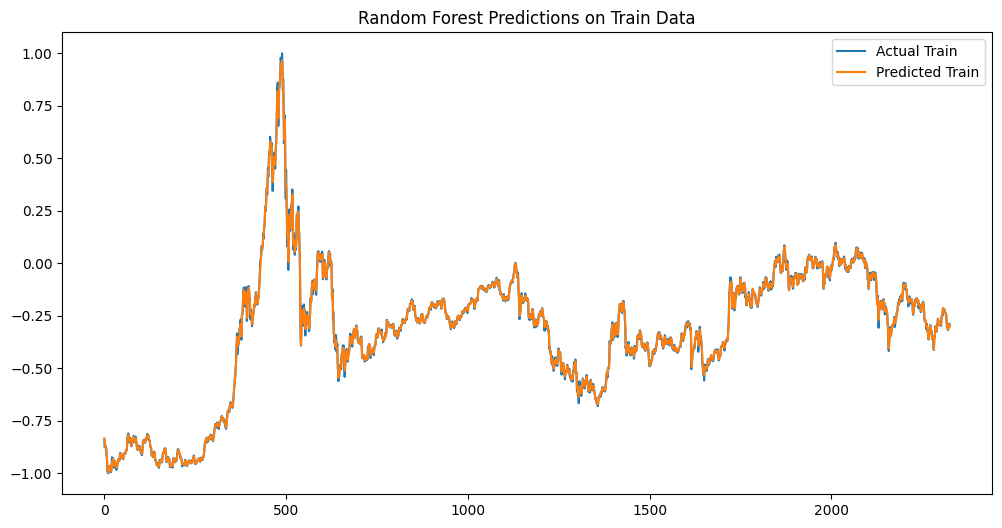

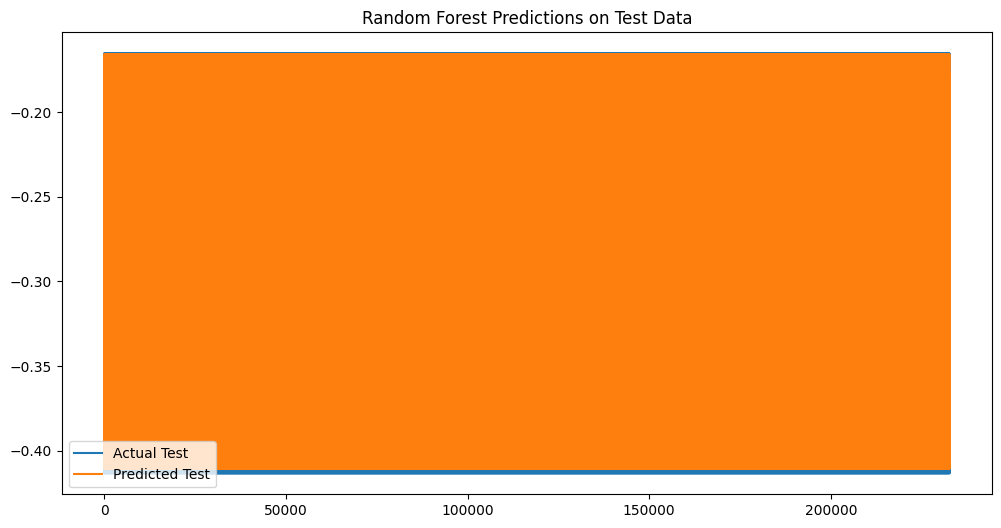

In [7]:
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)
    
    mse_train = mean_squared_error(y_train, train_pred)
    print(mse_train)
    mse_test = mean_squared_error(y_test, test_pred)
    print(mse_test)
    
    # 绘制训练集的预测结果
    plt.figure(figsize=(12, 6))
    plt.plot(y_train, label='Actual Train')
    plt.plot(train_pred, label='Predicted Train')
    plt.legend()
    plt.title('Random Forest Predictions on Train Data')
    plt.show()

    # 绘制测试集的预测结果
    plt.figure(figsize=(12, 6))
    plt.plot(y_test, label='Actual Test')
    plt.plot(test_pred, label='Predicted Test')
    plt.legend()
    plt.title('Random Forest Predictions on Test Data')
    plt.show()